У цьому домашньому завданні ми будемо працювати з набором даних Tips. Нижче інформація про нього.

**Про датасет:**

Tips - це датасет, який містить інформацію про рахунки та чайові в ресторані.

**Колонки датасету:**
- `total_bill` - загальна сума рахунку (долари)
- `tip` - розмір чайових (долари)
- `sex` - стать відвідувача (Male/Female)
- `smoker` - чи курить (Yes/No)
- `day` - день тижня (Thur/Fri/Sat/Sun)
- `time` - час відвідування (Lunch/Dinner)
- `size` - розмір групи (кількість людей)

**Джерело:** Оригінальні дані зібрані в одному з американських ресторанів у 1990-х роках. Скачати і переглянути набір даних можна тут: https://www.kaggle.com/datasets/sakshisatre/tips-dataset

А також ми вже вивантажили файл з даними і завантажили вам у Матеріали до цього модуля.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


** short remark **
не інтерактивну частину робила в Google Colab, потім він не захотів відображати інтерактивні графіки (localhost refused to connect) і продовжила в Jupiter Notbook

In [1]:
import pandas as pd

tips = pd.read_csv('tips.csv')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3





**1. Гістограма розподілу рахунків**
Завантажте датасет Tips (Чайові) з файла у матеріалах `tips.csv`.
Створіть гістограму для колонки `total_bill` з 20 bins.
Опціонально можна додати підписи осей ОХ, ОУ, а також назву графіку.

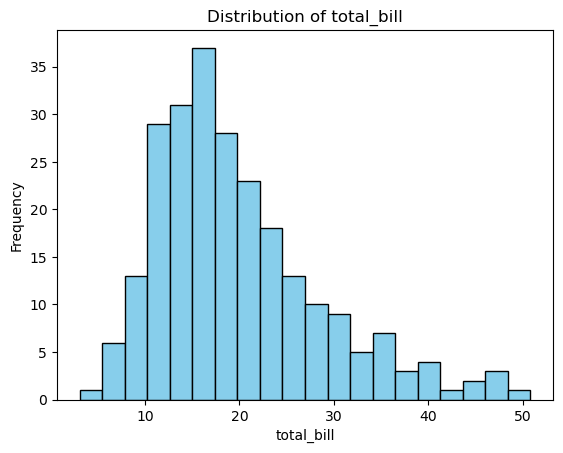

In [3]:
import matplotlib.pyplot as plt

plt.hist(tips['total_bill'], bins=20, color='skyblue', edgecolor = 'black')

plt.xlabel('total_bill')
plt.ylabel('Frequency')
plt.title('Distribution of total_bill')

plt.show()

---

**2. Box plot чайових за днями тижня**

Створіть box plot, який показує розподіл чайових (`tip`) за днями тижня (`day`).
В який день навище медіанне (середнє) значення продажів? Зелена горизонтальна лінія всередині кожного box-plot.


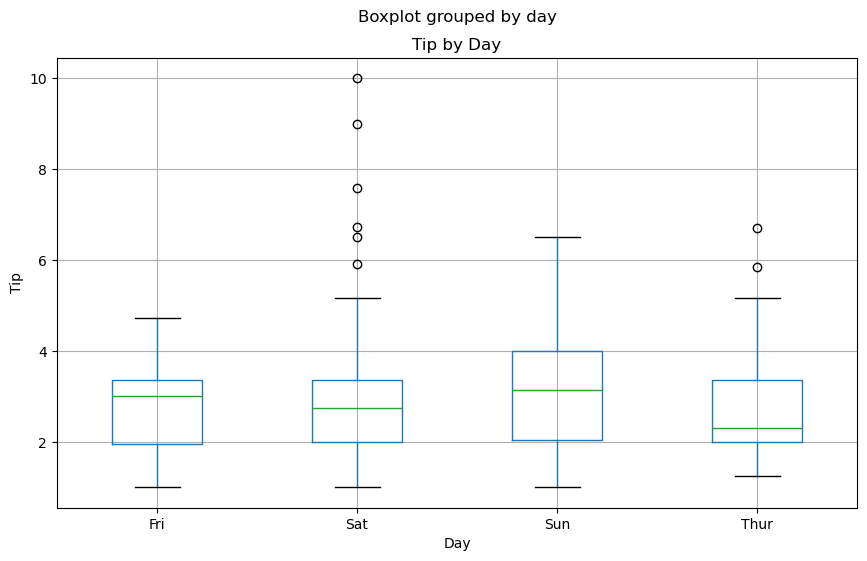

In [5]:
tips.boxplot(column='tip', by='day', figsize=(10, 6));
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Tip by Day')
plt.show()

Найвище медіанне значення продажів у неділю

---

**3. Scatter plot: рахунок vs чайові**

Створіть діаграму розсіювання для `total_bill` та `tip`.

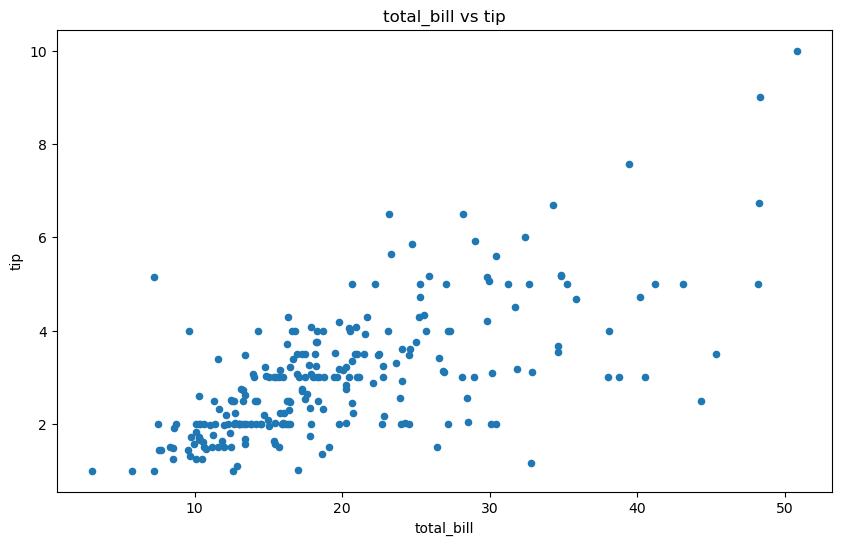

In [7]:
tips.plot.scatter(x='total_bill', y='tip', figsize=(10, 6))

plt.title('total_bill vs tip')
plt.xlabel('total_bill')
plt.ylabel('tip');

Ми можемо зробити висновок, що чим більше total_bill тим більше tip

---

**4. Bar chart: середній рахунок за часом**

Створіть стовпчасту діаграму середнього рахунку за часом дня (`time`).

time
Dinner    20.80
Lunch     17.17
Name: total_bill, dtype: float64


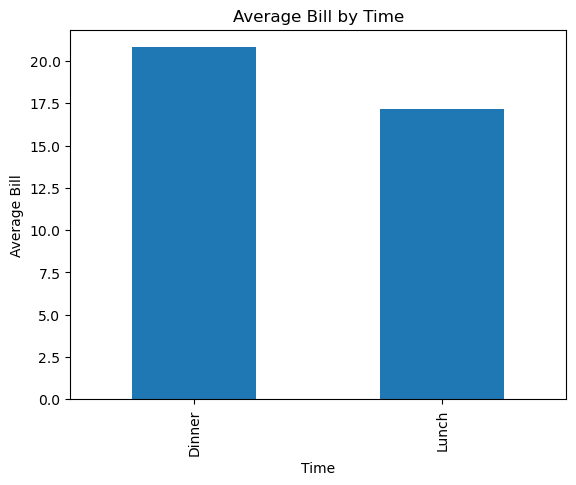

In [9]:
tips_avr_bill = tips.groupby('time')['total_bill'].mean().round(2)
print(tips_avr_bill)

tips_avr_bill.plot.bar();
plt.xlabel('Time')
plt.ylabel('Average Bill')
plt.title('Average Bill by Time');


За вечерю люди в середньому платять більше ніж за обід, що виглядає логічно

---

**5. Інтерактивна діаграма розсіювання**

Створіть з допомогою бібліотек Plotly інтерактивний scatter plot для `total_bill` vs `tip` з кольором за статтю (`sex`).


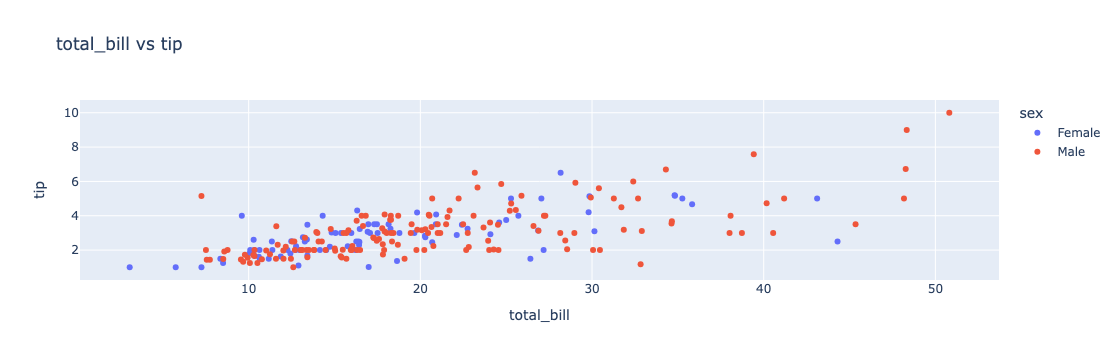

In [25]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(tips, x = 'total_bill', y = 'tip', color = 'sex',
             title = 'total_bill vs tip')

fig.show()


---

**6. Інтерактивний box plot: чайові за днями та статтю**

Створіть інтерактивний box plot для чайових за днями тижня з розбивкою за кольором по статі.

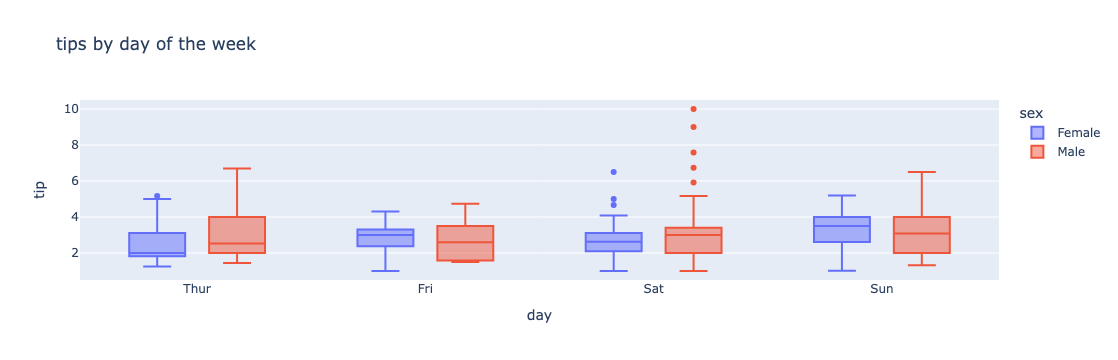

In [67]:
fig = px.box(tips, x = 'day', y = 'tip', color = 'sex',
            category_orders={'day': ['Thur', 'Fri', 'Sat', 'Sun']},
            title = 'tips by day of the week')

fig.show()